In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
register_matplotlib_converters()
import warnings
warnings.simplefilter("ignore")
from time import time
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [14]:
data = pd.read_csv('Datasets/ice_cream.csv')
data.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [31]:
data.shape

(577, 2)

In [15]:
df= data.copy()
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       577 non-null    object 
 1   IPN31152N  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [17]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


Check for stationary and non-stationary

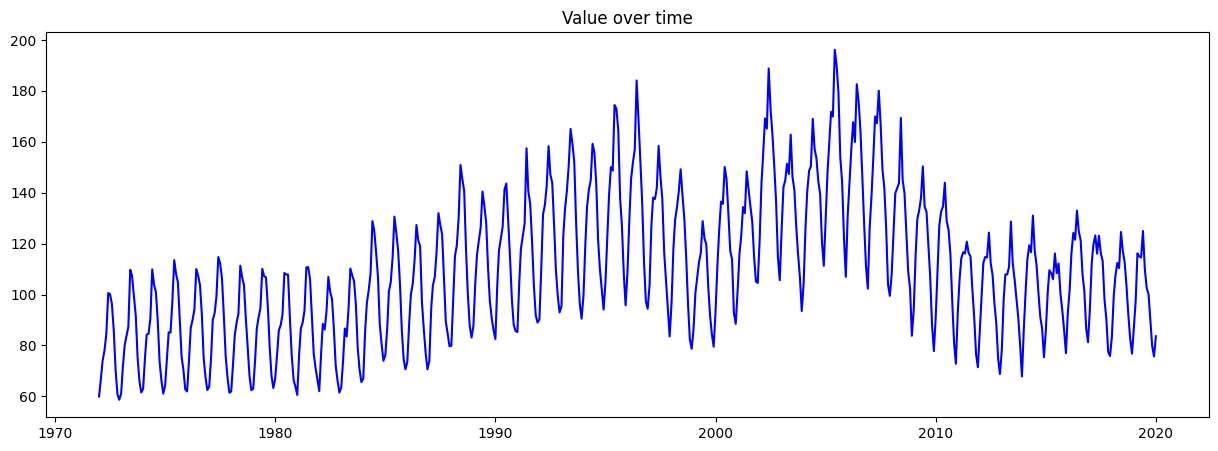

In [18]:
plt.figure(figsize=(15,5))

plt.plot(df, color='blue')
plt.title('Value over time')
plt.show()

In [19]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

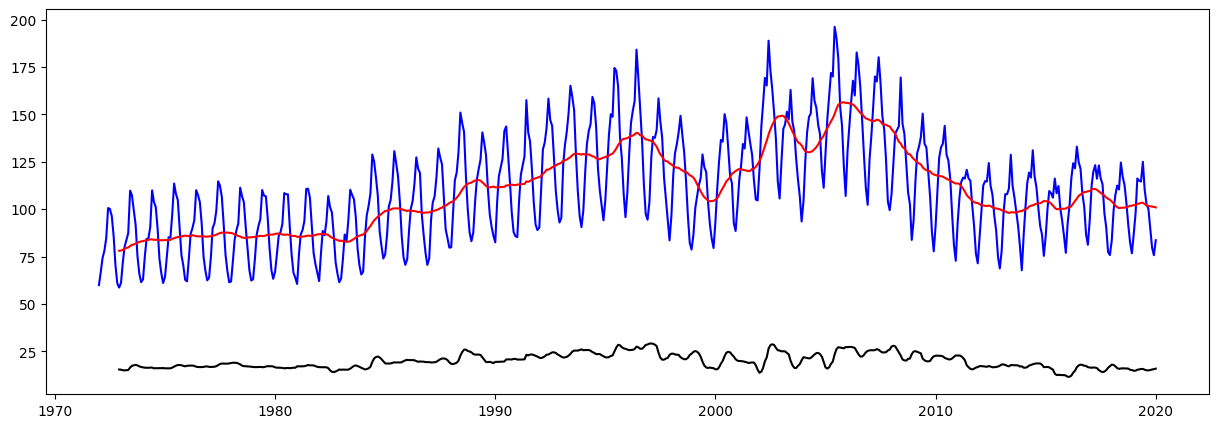

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df, color='blue', label='original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.show()

Perform ADF testing


In [ ]:
adf_test = sm.tsa.adfuller(df)
print('p-value: %f' % adf_test[1])
#the p value should be less than 0.05 to reject null hypothesis and being stationary.

p-value: 0.401499


Perform KPSS Test

In [ ]:
kpss_test = sm.tsa.kpss(df)
print('p-value: %f' % kpss_test[1])
# the p value should be greater than 0.05 for accepting the null hypothesis and being stationary.

p-value: 0.010000


Differencing

In [25]:
first_diff = df.diff().dropna()
first_diff.head()

,IPN31152N
DATE,
1972-02-01,7.0983
1972-03-01,7.1745
1972-04-01,3.8770
1972-05-01,6.6516
1972-06-01,15.8324


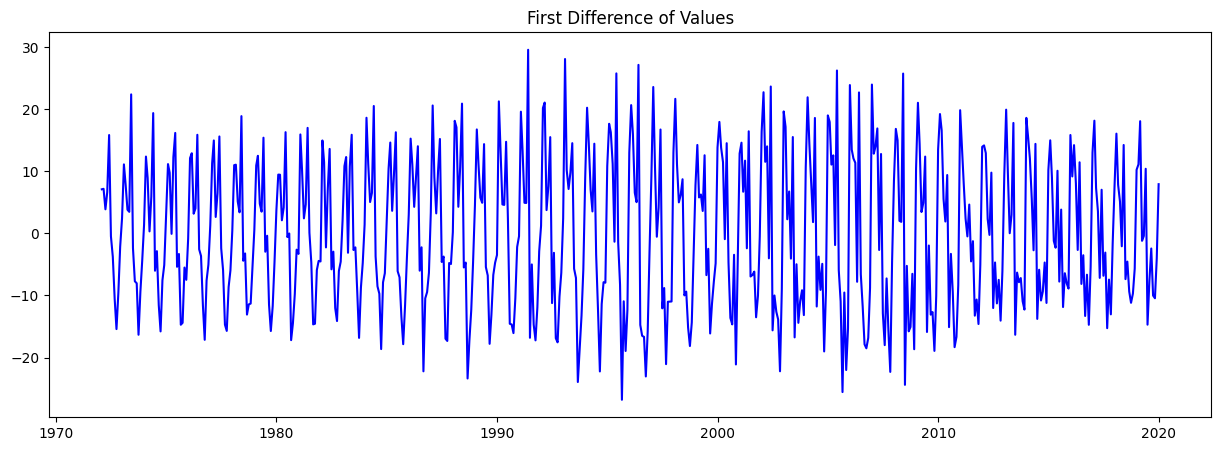

In [27]:
plt.figure(figsize=(15,5))
plt.plot(first_diff, color='blue', label='first_diff')
plt.title('First Difference of Values')
plt.show()

In [28]:
adf_test = sm.tsa.adfuller(first_diff)
print('p-value: %f' % adf_test[1])

p-value: 0.000000


In [30]:
kpss_test = sm.tsa.kpss(first_diff)
print('p-value: %f' % kpss_test[1])

p-value: 0.100000


In [ ]:
#both results indicate that this is stationary.


ACF

<Figure size 1000x600 with 0 Axes>

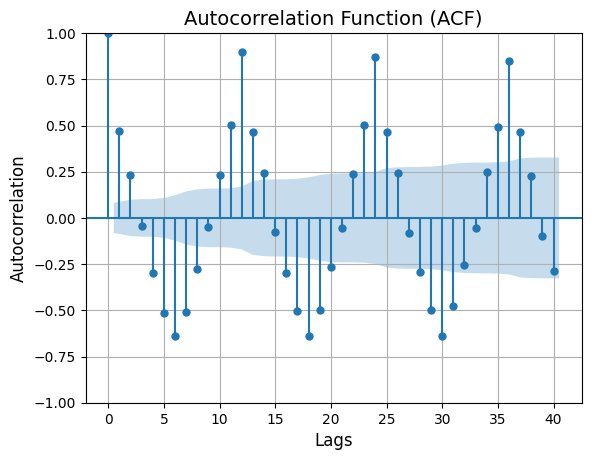

In [33]:
plt.figure(figsize=(10,6))
plot_acf(first_diff, lags=40)
plt.title('Autocorrelation Function (ACF)', fontsize=14)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.grid()
plt.show()

PACF

<Figure size 1000x600 with 0 Axes>

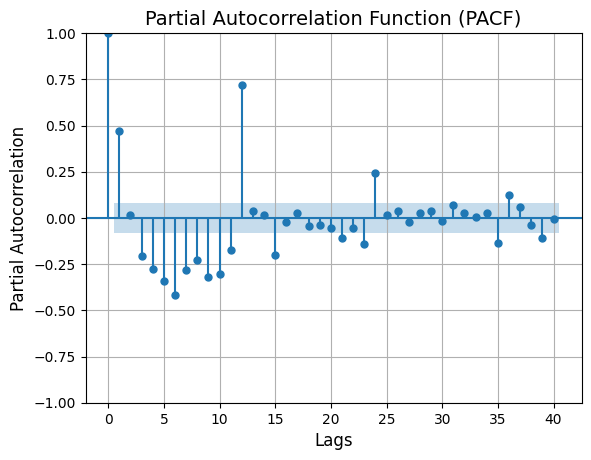

In [35]:
plt.figure(figsize=(10,6))
plot_pacf(first_diff, lags=40)
plt.title('Partial Autocorrelation Function (PACF)', fontsize=14)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.grid()
plt.show()

In [38]:
df.index.min()

Timestamp('1972-01-01 00:00:00')

In [41]:
train_end = datetime(2008,12,1)
test_end = datetime(2020,1,1)

train_data = first_diff[:train_end]
test_data = first_diff[datetime(2009,1,1):test_end]

ARIMA

                               SARIMAX Results                                
Dep. Variable:              IPN31152N   No. Observations:                  443
Model:                ARIMA(12, 0, 0)   Log Likelihood               -1321.802
Date:                Mon, 27 Oct 2025   AIC                           2671.604
Time:                        15:18:56   BIC                           2728.914
Sample:                    02-01-1972   HQIC                          2694.206
                         - 12-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0881      0.175      0.504      0.615      -0.255       0.431
ar.L1         -0.1279      0.027     -4.713      0.000      -0.181      -0.075
ar.L2         -0.0635      0.031     -2.080      0.0

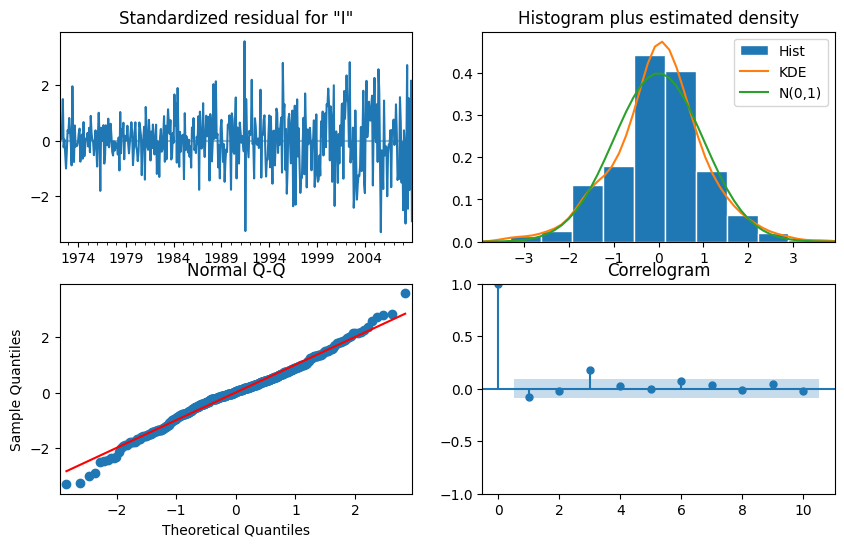

In [40]:
model = ARIMA(train_data, order=(12,0,0))

fitted_model = model.fit()
print(fitted_model.summary())
fitted_model.plot_diagnostics(figsize=(10,6))
plt.show()

In [42]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [44]:
predictions = fitted_model.predict(start= pred_start_date, end=pred_end_date)
residuals = test_data['IPN31152N']-predictions

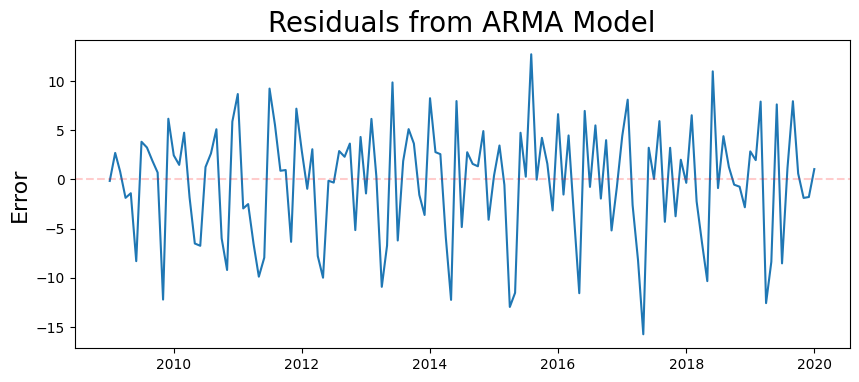

In [45]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [ ]:
residuals

np.int64(0)

Text(0, 0.5, 'Sales')

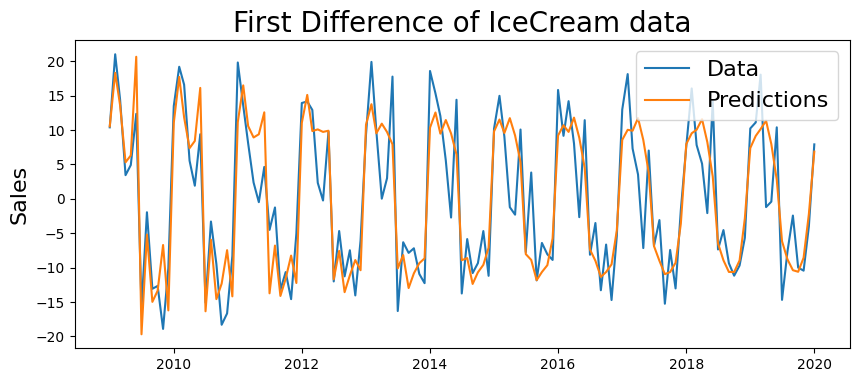

In [46]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('First Difference of IceCream data', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [53]:
print('RMSE is :', np.sqrt(np.mean(residuals**2)))

RMSE is : 5.74400442360905


SARIMA

                                      SARIMAX Results                                      
Dep. Variable:                           IPN31152N   No. Observations:                  443
Model:             SARIMAX(11, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -1331.567
Date:                             Mon, 27 Oct 2025   AIC                           2689.135
Time:                                     15:54:22   BIC                           2742.351
Sample:                                 02-01-1972   HQIC                          2710.123
                                      - 12-01-2008                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1449      0.041     -3.542      0.000      -0.225      -0.065
ar.L2         -0.0144      

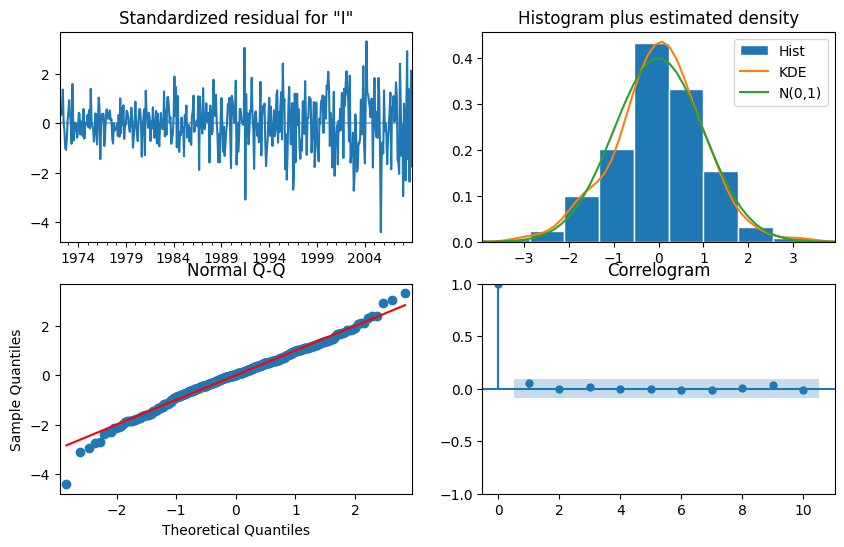

In [54]:
model = SARIMAX(train_data, 
                order=(11, 0, 0), 
                seasonal_order=(1, 0, 0, 12))

# Fit the model
fitted_model = model.fit()

# Print the summary of the fitted model
print(fitted_model.summary())

# Plot diagnostics
fitted_model.plot_diagnostics(figsize=(10, 6))
plt.show()

In [55]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
#get the predictions and residuals
predictions = fitted_model.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['IPN31152N'] - predictions

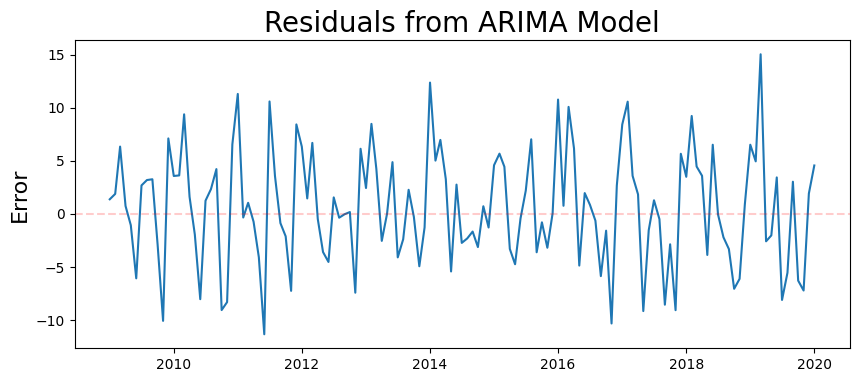

In [56]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
#get the predictions and residuals
predictions = fitted_model.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['IPN31152N'] - predictions
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

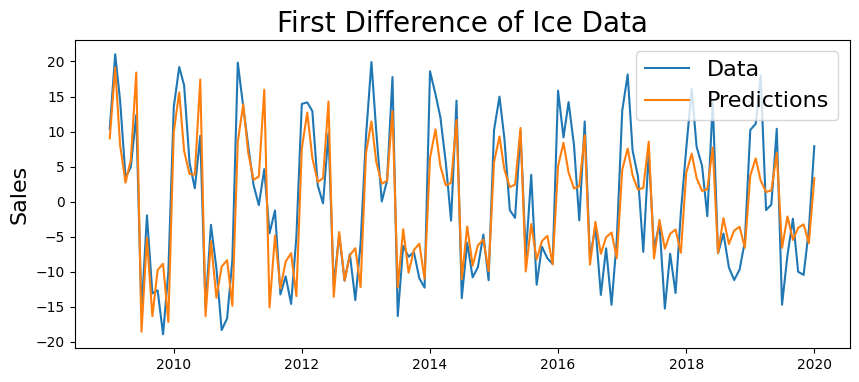

In [57]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('First Difference of Ice Data', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [58]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 5.364924282666616
